# Trading Strategies powered by Machine Learning - Classification

## Logistic Regression with scikit-learn - a simple Introduction (Part 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [3]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) 

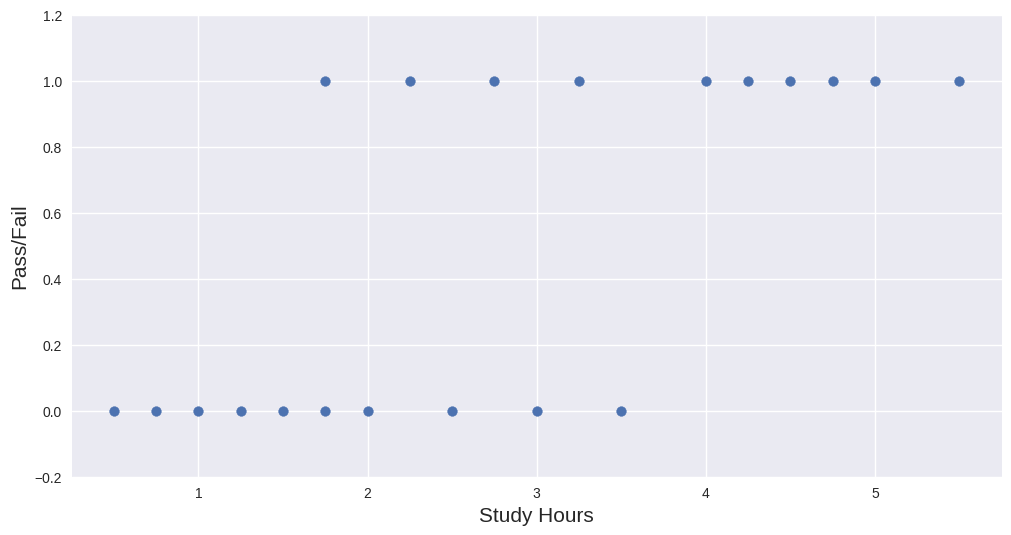

In [4]:
plt.figure(figsize=(12, 6))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.show()

In [5]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [6]:
data

,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression(fit_intercept= True)

In [9]:
lm.fit(data.hours.to_frame(), data.success)

LinearRegression()

In [10]:
lm.coef_

array([0.23459561])

In [11]:
lm.intercept_

-0.15393526898848708

In [12]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


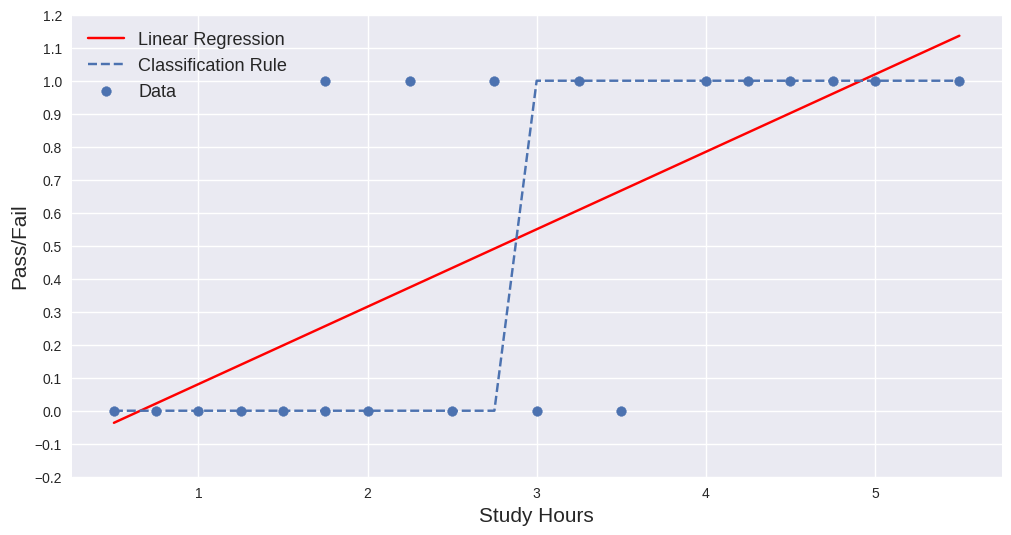

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Linear Regression")
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle = "--", label = "Classification Rule")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

## Logistic Regression with scikit-learn - a simple Introduction (Part 2)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lm = LogisticRegression()

In [16]:
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


In [17]:
lm.fit(data.hours.to_frame(), data.success)

LogisticRegression()

In [18]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


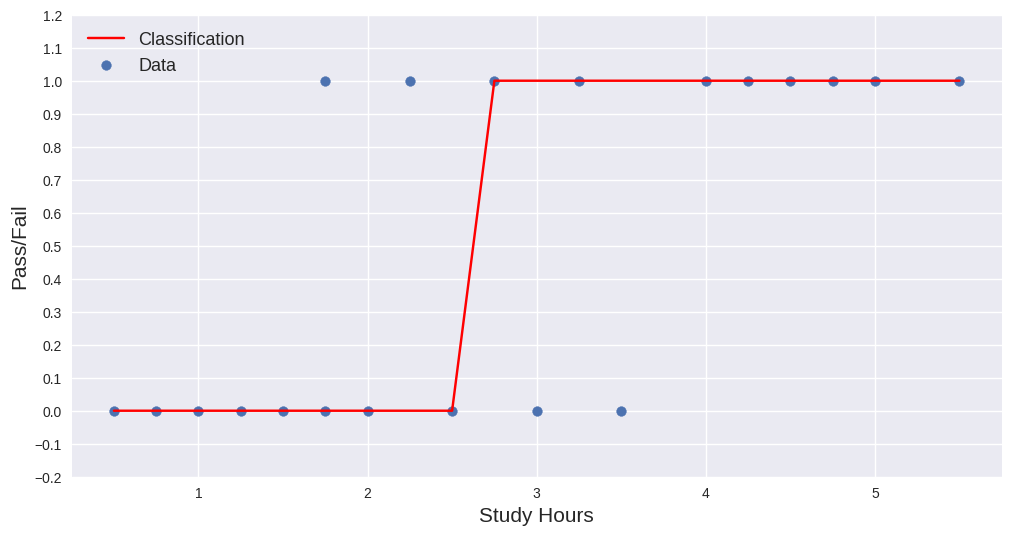

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

In [20]:
proba = lm.predict_proba(data.hours.to_frame())
proba

array([[0.92858952, 0.07141048],
       [0.90704455, 0.09295545],
       [0.87984046, 0.12015954],
       [0.84602638, 0.15397362],
       [0.80480773, 0.19519227],
       [0.75574059, 0.24425941],
       [0.75574059, 0.24425941],
       [0.69895285, 0.30104715],
       [0.63533317, 0.36466683],
       [0.56660539, 0.43339461],
       [0.49521602, 0.50478398],
       [0.42402118, 0.57597882],
       [0.3558463 , 0.6441537 ],
       [0.29305565, 0.70694435],
       [0.18924992, 0.81075008],
       [0.14905371, 0.85094629],
       [0.11617173, 0.88382827],
       [0.08977835, 0.91022165],
       [0.06891381, 0.93108619],
       [0.04000986, 0.95999014]])

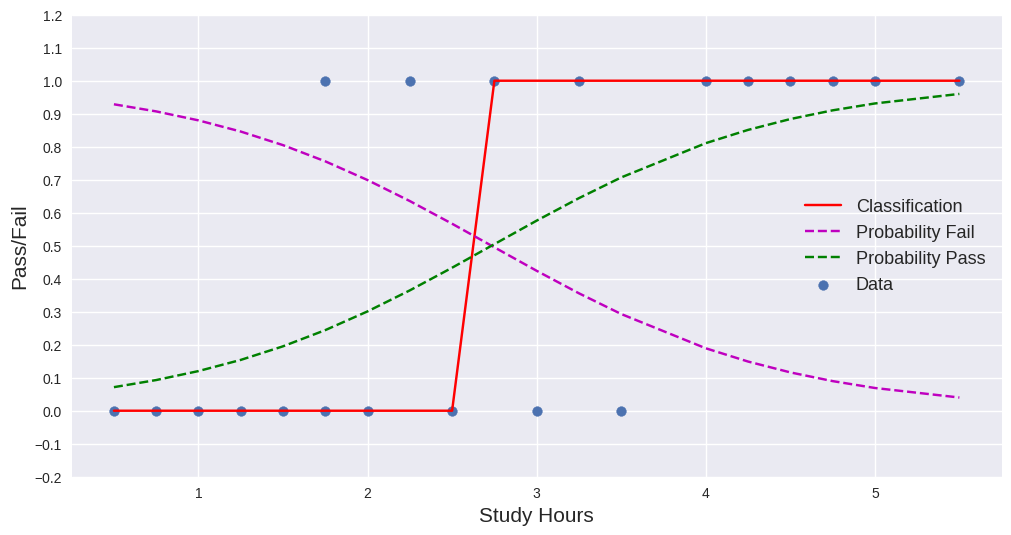

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.plot(data.hours, proba[:, 0], "m--", label = "Probability Fail")
plt.plot(data.hours, proba[:, 1], "g--", label = "Probability Pass")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

## Getting and Preparing the Data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [23]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

In [24]:
data["returns"] = np.log(data.div(data.shift(1)))

In [25]:
data.dropna(inplace = True)

In [26]:
data["direction"] = np.sign(data.returns)

In [27]:
data

,price,returns,direction
time,,,
2019-01-01 22:05:00+00:00,1.146350,-0.000201,-1.0
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,0.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,-1.0
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0


In [28]:
data.direction.value_counts()

 1.0    36058
-1.0    35702
 0.0     1959
Name: direction, dtype: int64

In [29]:
lags = 5

In [30]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [31]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022


## Predicting Market Direction with Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lm = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr")

In [34]:
lm.fit(data[cols], data.direction)

LogisticRegression(C=1000000.0, max_iter=100000, multi_class='ovr')

In [35]:
data["pred"] = lm.predict(data[cols])

In [36]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022,1.0


In [37]:
data.pred.value_counts()

 1.0    41406
-1.0    32308
Name: pred, dtype: int64

In [38]:
hits = np.sign(data.direction * data.pred).value_counts()

In [39]:
hits

 1.0    37608
-1.0    34148
 0.0     1958
dtype: int64

In [40]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5101880239845891

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_true = data.direction, y_pred = data.pred)

0.5101880239845891

## In-Sample Backtesting and the Look-ahead-bias

In [43]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022,1.0


In [44]:
data["strategy"] = data.pred * data.returns

In [45]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

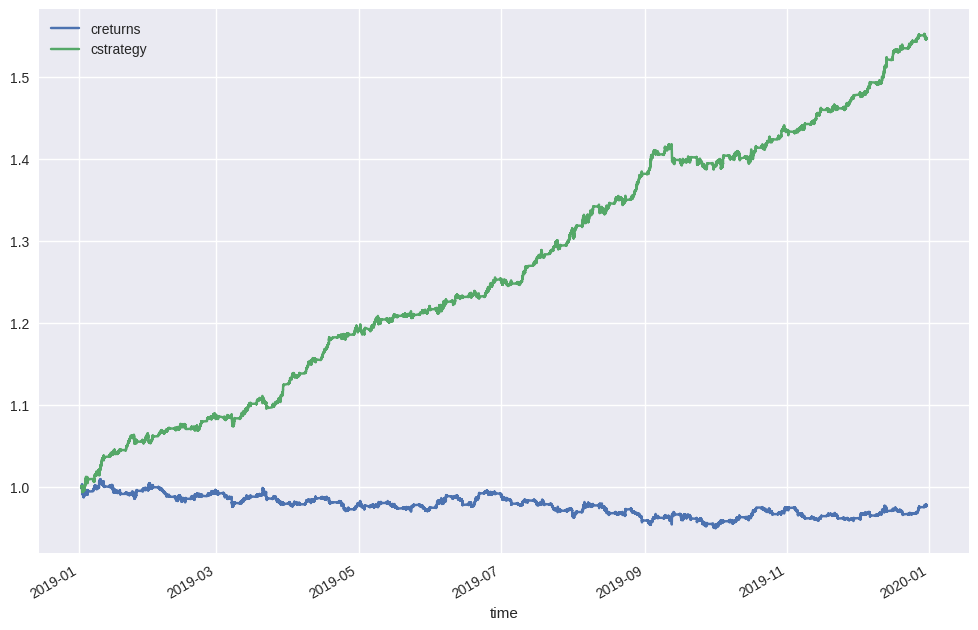

In [46]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [47]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [48]:
data.trades.value_counts()

0.0    44780
2.0    28934
Name: trades, dtype: int64

In [49]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred,strategy,creturns,cstrategy,trades
time,,,,,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0,-0.000017,0.999983,0.999983,0.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0,0.000000,0.999983,0.999983,0.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0,0.000074,0.999908,1.000057,2.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0,-0.000048,0.999860,1.000009,2.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0,0.000140,1.000000,1.000148,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0,-0.000004,0.977064,1.547038,0.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,1.0,0.000027,0.977091,1.547079,0.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022,1.0,0.000076,0.977165,1.547197,0.0


## Out-Sample Forward Testing

In [50]:
data = pd.read_csv("test_set.csv", parse_dates = ["time"], index_col = "time")

In [51]:
data

,price
time,
2020-01-01 22:00:00+00:00,1.121325
2020-01-01 22:05:00+00:00,1.121250
2020-01-01 22:10:00+00:00,1.121250
2020-01-01 22:15:00+00:00,1.121460
2020-01-01 22:20:00+00:00,1.121540
...,...
2020-08-30 23:35:00+00:00,1.190895
2020-08-30 23:40:00+00:00,1.191240
2020-08-30 23:45:00+00:00,1.191515


In [52]:
data["returns"] = np.log(data.div(data.shift(1)))

In [53]:
data["direction"] = np.sign(data.returns)

In [54]:
data

,price,returns,direction
time,,,
2020-01-01 22:00:00+00:00,1.121325,NaN,NaN
2020-01-01 22:05:00+00:00,1.121250,-0.000067,-1.0
2020-01-01 22:10:00+00:00,1.121250,0.000000,0.0
2020-01-01 22:15:00+00:00,1.121460,0.000187,1.0
2020-01-01 22:20:00+00:00,1.121540,0.000071,1.0
...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0


In [55]:
lags = 5

In [56]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [57]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.000022,0.000071,0.000187,0.000000,-0.000067
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.000004,-0.000022,0.000071,0.000187,0.000000
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.000031,0.000004,-0.000022,0.000071,0.000187
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.000004,0.000031,0.000004,-0.000022,0.000071
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.000031,-0.000004,0.000031,0.000004,-0.000022
...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046


In [58]:
data["pred"] = lm.predict(data[cols])

In [59]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.000004,-0.000022,0.000071,0.000187,0.000000,-1.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.000031,0.000004,-0.000022,0.000071,0.000187,-1.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.000004,0.000031,0.000004,-0.000022,0.000071,-1.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.000031,-0.000004,0.000031,0.000004,-0.000022,1.0
...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151,1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046,-1.0


In [60]:
data.pred.value_counts()

 1.0    26288
-1.0    23073
Name: pred, dtype: int64

In [61]:
hits = np.sign(data.direction * data.pred).value_counts()

In [62]:
hits

 1.0    25115
-1.0    23634
 0.0      612
dtype: int64

In [63]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.508802495897571

In [64]:
data["strategy"] = data.pred * data.returns

In [65]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

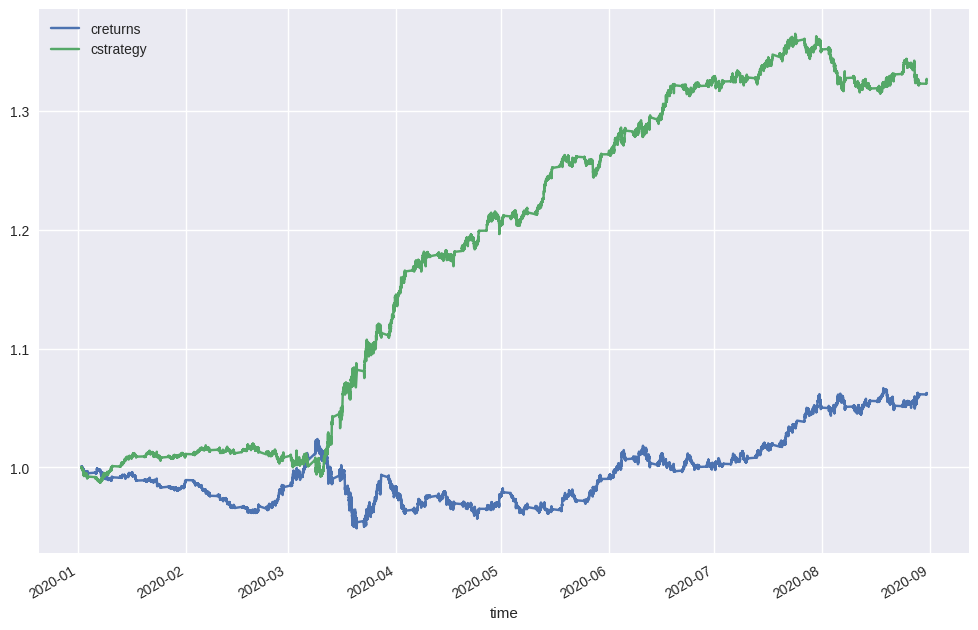

In [66]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [67]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [68]:
data.trades.value_counts()

0.0    30224
2.0    19137
Name: trades, dtype: int64

In [69]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred,strategy,creturns,cstrategy,trades
time,,,,,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.0,0.000004,1.000004,1.000004,0.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.000004,-0.000022,0.000071,0.000187,0.000000,-1.0,-0.000031,1.000036,0.999973,2.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.000031,0.000004,-0.000022,0.000071,0.000187,-1.0,0.000004,1.000031,0.999978,0.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.000004,0.000031,0.000004,-0.000022,0.000071,-1.0,0.000031,1.000000,1.000009,0.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.000031,-0.000004,0.000031,0.000004,-0.000022,1.0,0.000357,1.000357,1.000366,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151,1.0,-0.000080,1.061863,1.326678,2.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000,1.0,0.000290,1.062170,1.327063,0.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046,-1.0,-0.000231,1.062416,1.326756,2.0
